In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [21]:
iris = load_iris()

In [22]:
X = iris.data[:, :2] 
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Bài 1**  Hãy thống kê số lượng nhãn (label) trên tập training và tập test vừa chia. Vẽ biểu 
đồ phân bố nhãn (Gợi ý: sử dụng barplot trong thư viện seaborn)

In [26]:
class_train = []
for i in y_train:
  if i == 0: class_train.append("Setosa (0)")
  elif i == 1: class_train.append('Versicolour (1)')
  else: class_train.append("Virginica (2)")

class_test = []
for i in y_test:
  if i == 0: class_test.append("Setosa (0)")
  elif i == 1: class_test.append('Versicolour (1)')
  else: class_test.append("Virginica (2)")

training_df = pd.DataFrame({
    "Target":y_train,
    "Class": class_train
})
training_df = pd.DataFrame({
    "Target": [0,1,2],
    "Count" : training_df.value_counts().values
})

test_df = pd.DataFrame({
    "Target":y_test,
    "Class": class_test
})
test_df = pd.DataFrame({
    "Target": [0,1,2],
    "Count" : test_df.value_counts().values
})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


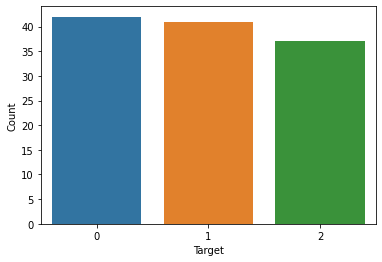

In [27]:
sns.barplot(training_df['Target'],training_df['Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


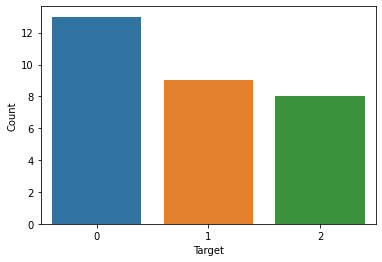

In [28]:
sns.barplot(test_df['Target'],test_df['Count'])

In [29]:
y_train.shape

(120,)

In [30]:
y_test.shape

(30,)

**Bài 2** Thực hiện huấn luyện mô hình Logistic Regression trên bộ dữ liệu (tham khảo 
theo các bước đã hướng dẫn).

In [31]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test) 

**Bài 3** Thực hiện huấn luyện mô hình K láng giềng gần nhất (KNN) trên bộ dữ liệu, sau 
đó so sánh độ chính xác (Accuracy) với mô hình LogisticRegression.

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test) 

In [57]:
accuracy_score(y_pred_lr, y_test)

0.7333333333333333

In [58]:
accuracy_score(y_pred_knn, y_test)

0.6666666666666666

**Bài 4 ** Đánh giá 2 mô hình vừa xây dựng trên 3 độ đo sau: precision_score, recall_score và f1_score sử dụng macro average

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
precision_score(y_pred_lr, y_test, average= 'macro')

0.772079772079772

In [36]:
recall_score(y_pred_lr, y_test, average= 'macro')

0.772079772079772

In [37]:
f1_score(y_pred_lr, y_test, average= 'macro')

0.7575757575757575

In [38]:
precision_score(y_pred_knn, y_test, average= 'macro')

0.7094017094017094

In [39]:
precision_score(y_pred_knn, y_test, average= 'macro')

0.7094017094017094

In [40]:
precision_score(y_pred_knn, y_test, average= 'macro')

0.7094017094017094

**Bài 5** Hãy sử dụng chiến lược tinh chỉnh tham số GridSearchCV để tìm ra bộ tham số
tốt nhất cho mô hình Logistic Regression. So sánh kết quả với mô hình gốc

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [59]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
multi_class = ['auto','ovr','multinomial']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
dual = [False,True]
warm_start = [False,True]
fit_intercept = [False,True]

In [61]:
grid = dict(solver=solvers,penalty=penalty,C=c_values, warm_start = warm_start, dual = dual, fit_intercept = fit_intercept, multi_class = multi_class)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# In ra kết quả
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
52200 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

Best: 0.830556 using {'C': 0.1, 'dual': False, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag', 'warm_start': False}
0.000000 (0.000000) with: {'C': 100, 'dual': False, 'fit_intercept': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg', 'warm_start': False}
0.000000 (0.000000) with: {'C': 100, 'dual': False, 'fit_intercept': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg', 'warm_start': True}
0.000000 (0.000000) with: {'C': 100, 'dual': False, 'fit_intercept': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'lbfgs', 'warm_start': False}
0.000000 (0.000000) with: {'C': 100, 'dual': False, 'fit_intercept': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'lbfgs', 'warm_start': True}
0.691667 (0.101265) with: {'C': 100, 'dual': False, 'fit_intercept': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': False}
0.691667 (0.101265) with: {'C': 100, 'dual': False, 'fit_inter